# Plot Saliency Map of the Inputs for Pretrained Models

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [2]:
import os

os.chdir('drive/My Drive/Pytorch/Dataset/Saliency Map')

**import necessary packages**

In [3]:
import torch
import torchvision
from torchsummary import summary
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import requests

**load pretrained model**

In [ ]:
device= 'cuda:0' if torch.cuda.is_available() else 'cpu'

model = torchvision.models.vgg19(pretrained= True)
model.to(device)

In [ ]:
def get(url, fname):

  response = requests.get(url)
  with open(fname, 'wb') as f :
    f.write(response.content)

In [ ]:
get("https://specials-images.forbesimg.com/imageserve/5db4c7b464b49a0007e9dfac/960x0.jpg?fit=scale", 'dog.jpg')
get("https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2019/12/03202400/Yellow-Labrador-Retriever.jpg", 'dog_big.jpg')

In [ ]:
Image.open('dog.jpg')

In [ ]:
Image.open('dogs_and_cats.jpeg')

**preprocess the input image**

In [7]:
def preprocess(image, size= 224):
  transform = T.Compose([
              T.Resize((size, size)),
              T.ToTensor(),
              T.Normalize(mean = [0.485, 0.456, 0.406]
                          , std= [0.229, 0.225, 0.224])])
  return transform(image)

def deprocess(tensor):
  transform = T.Compose([
              T.Normalize(mean= [0, 0, 0]
                          , std = [4.3668, 4.4444, 4.4642]) , 
              T.Normalize(mean= [-0.485, -0.456, -0.406]
                          , std = [1, 1, 1]),
              T.ToPILImage()])          
  return transform(tensor)

def show_image(image_pil, cmap):
  plt.imshow(np.array(image_pil), cmap= cmap)  
  plt.axis('off')


In [ ]:
img = Image.open('dog.jpg')
t = preprocess(img)

In [30]:
img = Image.open('dog-cat-1.jpg')
t = preprocess(img)

In [31]:
d = deprocess(t)

In [ ]:
plt.imshow(np.array(d))


**Get the Saliency Map....**

In [33]:
X = preprocess(img)
X = X.unsqueeze(0)

model.eval()

X.requires_grad_()

scores = model(X.to(device))

#max_index = torch.argmax(scores)
#max_value = scores[0, max_index]

#max_value.backward()


In [34]:
max_value, max_index = scores.topk(2, largest= False)

max_value[0][1].backward()


In [35]:
val, idx = torch.max(X.grad.abs(), dim= 1)

val.size()

torch.Size([1, 224, 224])

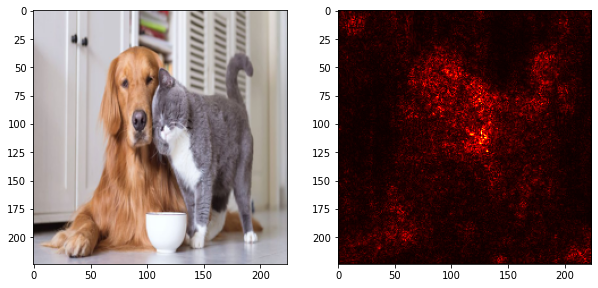

In [36]:
fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize= (10,10))

axs[0].imshow(img.resize(size= (224, 224)))
axs[1].imshow(np.array(val[0]), cmap= plt.cm.hot)  

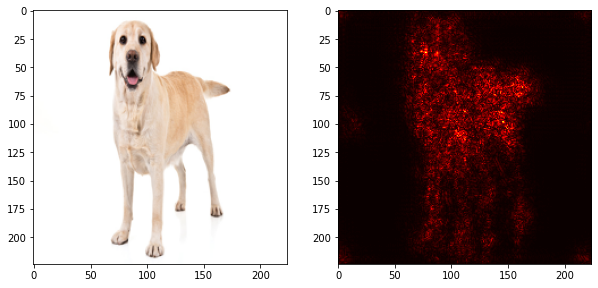

In [ ]:
fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize= (10,10))

axs[0].imshow(img.resize(size= (224, 224)))
axs[1].imshow(np.array(val[0]), cmap= plt.cm.hot)